In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
import matplotlib.pyplot as plt
import random

# Custom plot function that adds random color automatically
def auto_plot(x, y, **kwargs):
    color = "#{:06x}".format(random.randint(0, 0xFFFFFF))
    plt.plot(x, y, color=color, **kwargs)
    plt.title(f"Auto Plot with Color {color}")
    plt.show()


In [14]:
dataframe = pd.read_csv("zomato.csv")
print(dataframe.head())

                                                 url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5  

In [15]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return str(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())

                                                 url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table rate  votes                             phone  \
0          Yes        Yes  4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1    787 

In [16]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         51717 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [17]:
dataframe.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [18]:
#firstly removing rows containing any null values
df_cleaned_rows=dataframe.dropna()
print("after rows")
print(df_cleaned_rows)
#removing columns containing any null values
df_cleaned_columns=dataframe.dropna(axis=1)
print("after columns")
print(df_cleaned_columns)


after rows
                                                     url  \
0      https://www.zomato.com/bangalore/jalsa-banasha...   
1      https://www.zomato.com/bangalore/spice-elephan...   
2      https://www.zomato.com/SanchurroBangalore?cont...   
3      https://www.zomato.com/bangalore/addhuri-udupi...   
4      https://www.zomato.com/bangalore/grand-village...   
...                                                  ...   
51705  https://www.zomato.com/bangalore/izakaya-gastr...   
51707  https://www.zomato.com/bangalore/m-bar-bengalu...   
51708  https://www.zomato.com/bangalore/keys-cafe-key...   
51711  https://www.zomato.com/bangalore/bhagini-2-whi...   
51715  https://www.zomato.com/bangalore/chime-sherato...   

                                                 address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
3      1st Floor, Annakuteer

In [19]:
# Cleaning rate
dataframe['rate'] = dataframe['rate'].astype(str).apply(lambda x: x.split('/')[0].strip())
dataframe['rate'] = pd.to_numeric(dataframe['rate'], errors='coerce')

# Cleaning approx cost
dataframe['approx_cost(for two people)'] = dataframe['approx_cost(for two people)'].astype(str).str.replace(',', '')
dataframe['approx_cost(for two people)'] = pd.to_numeric(dataframe['approx_cost(for two people)'], errors='coerce')

# Drop rows with nulls in key categorical columns
dataframe = dataframe.dropna(subset=['listed_in(type)', 'rate', 'approx_cost(for two people)'])


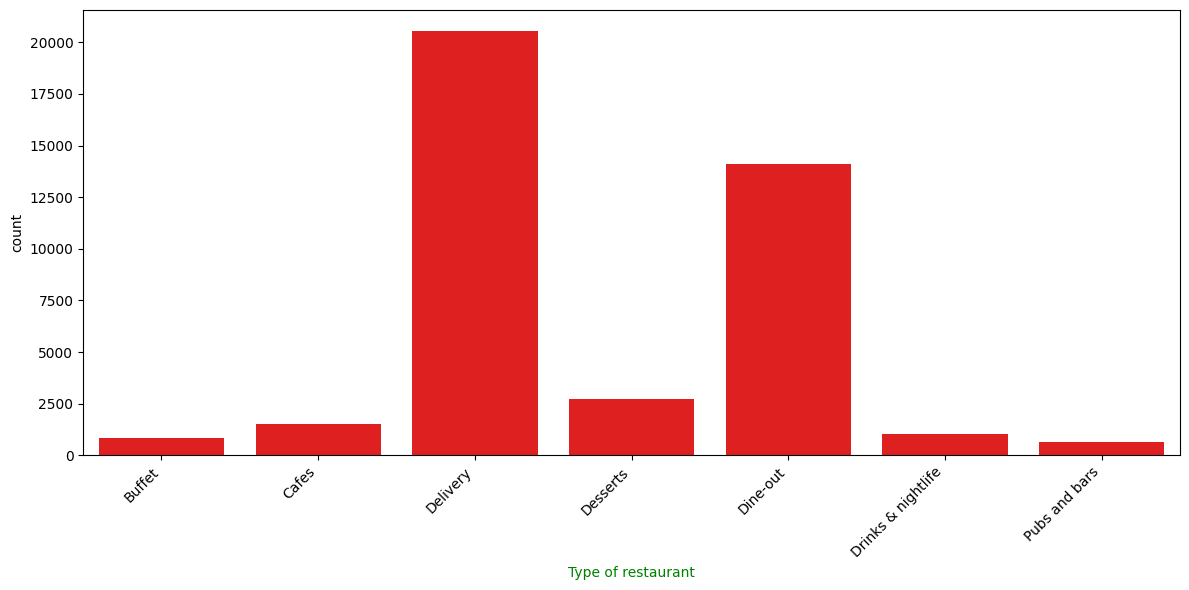

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cleaning rate
dataframe['rate'] = dataframe['rate'].astype(str).apply(lambda x: x.split('/')[0].strip())
dataframe['rate'] = pd.to_numeric(dataframe['rate'], errors='coerce')

# Cleaning approx cost
dataframe['approx_cost(for two people)'] = dataframe['approx_cost(for two people)'].astype(str).str.replace(',', '')
dataframe['approx_cost(for two people)'] = pd.to_numeric(dataframe['approx_cost(for two people)'], errors='coerce')

# Drop rows with nulls in key categorical columns
dataframe = dataframe.dropna(subset=['listed_in(type)', 'rate', 'approx_cost(for two people)'])

# Plotting
plt.figure(figsize=(12, 6))  # Optional: adjust width & height
sns.countplot(x='listed_in(type)', data=dataframe, color='red')
plt.xlabel("Type of restaurant", color='green')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


Text(55.847222222222214, 0.5, 'Votes')

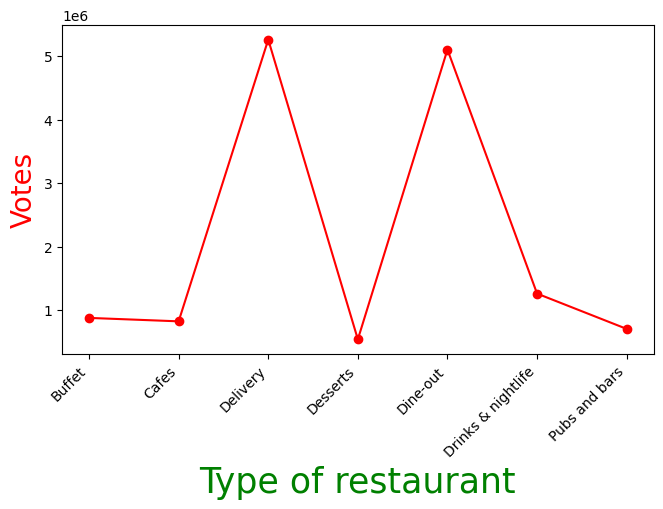

In [21]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='red', marker='o')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout to prevent clipping
plt.xlabel('Type of restaurant', c='green', size=25)
plt.ylabel('Votes', c='red', size=20)

In [22]:
max_votes=dataframe['votes'].max()
restaurent_with_max_votes=dataframe.loc[dataframe['votes']==max_votes,'name']
print("restaurent with max votes")
print(restaurent_with_max_votes)

restaurent with max votes
49170    Byg Brewski Brewing Company
49627    Byg Brewski Brewing Company
50059    Byg Brewski Brewing Company
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

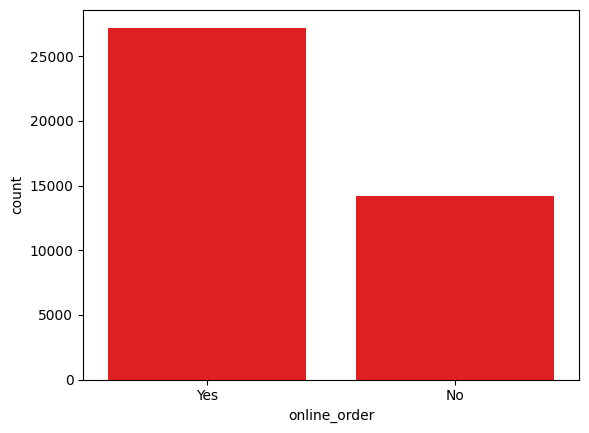

In [23]:
sns.countplot(x=dataframe['online_order'],color='red')

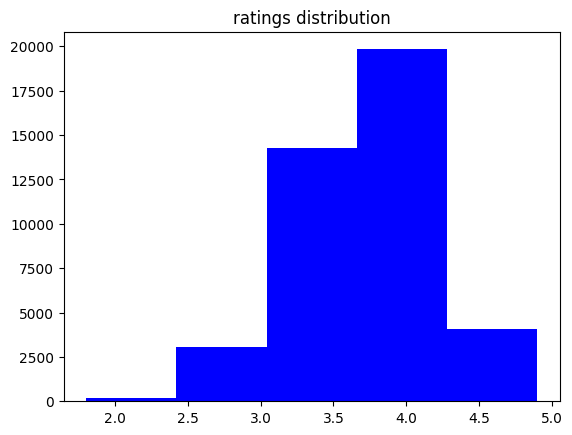

In [24]:
plt.hist(dataframe['rate'],bins=5,color='blue')
plt.title('ratings distribution')
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_11900\4130371130.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cost_range', data=dataframe, palette='coolwarm')


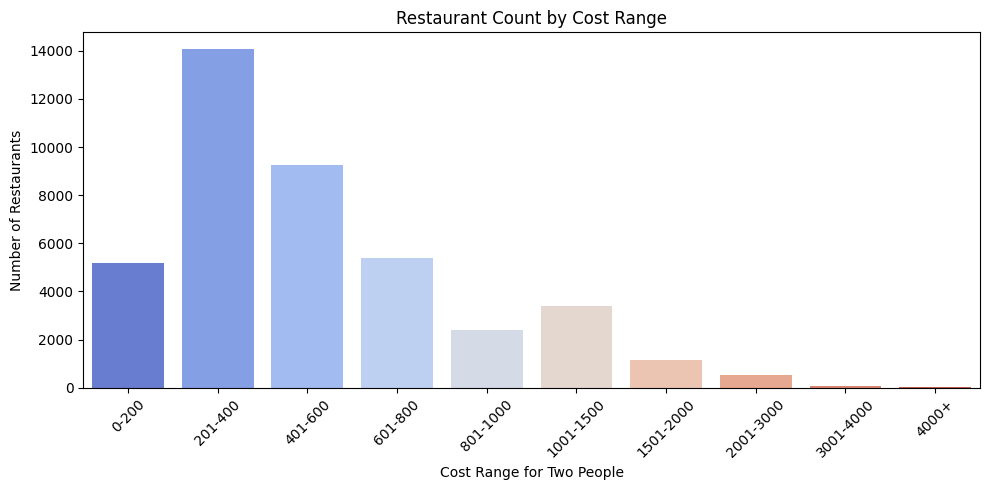

In [25]:
# Create cost bins
bins = [0, 200, 400, 600, 800, 1000, 1500, 2000, 3000, 4000, 10000]
labels = ['0-200', '201-400', '401-600', '601-800', '801-1000', '1001-1500', '1501-2000', '2001-3000', '3001-4000', '4000+']
dataframe['cost_range'] = pd.cut(dataframe['approx_cost(for two people)'], bins=bins, labels=labels)

# Plot as countplot
plt.figure(figsize=(10, 5))
sns.countplot(x='cost_range', data=dataframe, palette='coolwarm')
plt.title("Restaurant Count by Cost Range")
plt.xlabel("Cost Range for Two People")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Axes: xlabel='online_order', ylabel='rate'>

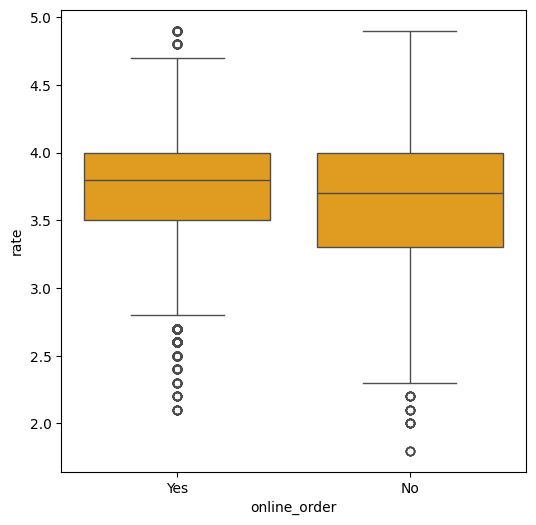

In [29]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=dataframe,color='orange')



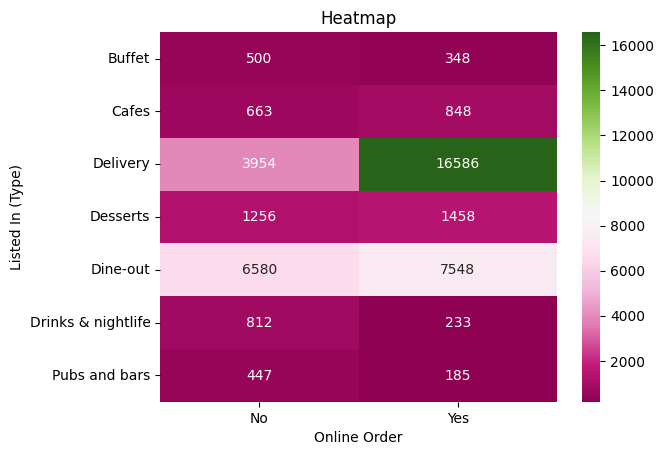

In [30]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='PiYG', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()